 # ANALISIS DE JJOO historico / Athens 1896 to Rio 2016. // Dataset extraido desde Kaggle // scraped data from www.sports-reference.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 10)

In [2]:
data1 = pd.read_csv('athlete_events.csv')

In [3]:
data2 = pd.read_csv('noc_regions.csv')

In [4]:
Colmsdata1 = data1.columns.unique()
Colmsdata1

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [5]:
Colmsdata2 = data2.columns.unique()
Colmsdata2

Index(['NOC', 'region', 'notes'], dtype='object')

In [6]:
## Consulta de paises ganadores por total de medallas 

In [7]:
Medallasxpais = data1.groupby('Team')['Medal'].value_counts().unstack().fillna(0)
Medallasxpais['Total'] = Medallasxpais.sum(axis=1)
Medallasxpais = Medallasxpais.sort_values(by='Total', ascending=False)

In [8]:
Medallasxpais.head(7)

Medal,Bronze,Gold,Silver,Total
Team,,,,
United States,1233.0,2474.0,1512.0,5219.0
Soviet Union,677.0,1058.0,716.0,2451.0
Germany,678.0,679.0,627.0,1984.0
Great Britain,572.0,519.0,582.0,1673.0
France,577.0,455.0,518.0,1550.0
Italy,484.0,535.0,508.0,1527.0
Sweden,507.0,451.0,476.0,1434.0


In [9]:
# Agrupar por país y sumar medallas de oro
Sologold = data1[data1['Medal'] == 'Gold'].groupby('Team')['Medal'].count().sort_values(ascending=False)

In [10]:
Sologold.head(7)

Team
United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Name: Medal, dtype: int64

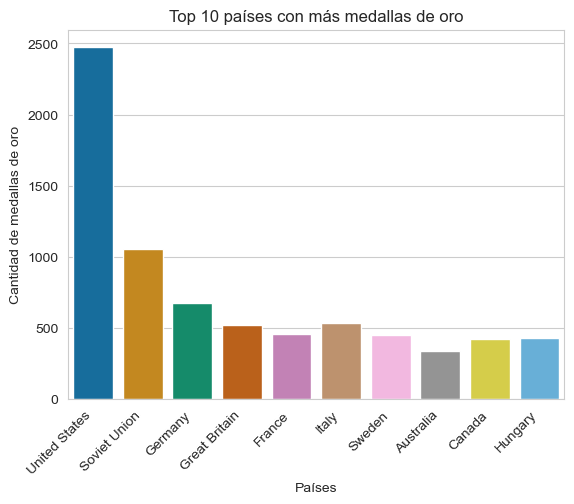

In [11]:
# Graficar las medallas de oro de los mejores paises
Medallasxpais = data1.groupby('Team')['Medal'].value_counts().unstack().fillna(0)
Medallasxpais['Total'] = Medallasxpais.sum(axis=1)
Medallasxpais = Medallasxpais.sort_values(by='Total', ascending=False)


sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.barplot(data=Medallasxpais.head(10), x=Medallasxpais.head(10).index, y='Gold')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Países')
plt.ylabel('Cantidad de medallas de oro')
plt.title('Top 10 países con más medallas de oro')
plt.show()

In [12]:
# Agrupar por país y sumar medallas de Silver
Solosilver = data1[data1['Medal'] == 'Silver'].groupby('Team')['Medal'].count().sort_values(ascending=False)

In [13]:
Solosilver.head(7)

Team
United States    1512
Soviet Union      716
Germany           627
Great Britain     582
France            518
Italy             508
Sweden            476
Name: Medal, dtype: int64

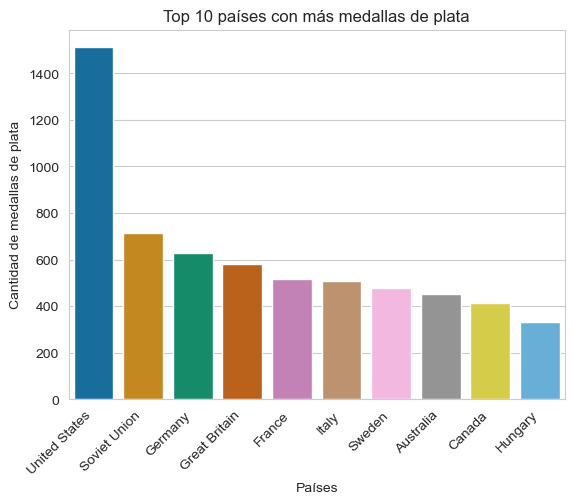

In [14]:
# Graficar las medallas de plata de los mejores paises
Medallasxpais = data1.groupby('Team')['Medal'].value_counts().unstack().fillna(0)
Medallasxpais['Total'] = Medallasxpais.sum(axis=1)
Medallasxpais = Medallasxpais.sort_values(by='Total', ascending=False)


sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.barplot(data=Medallasxpais.head(10), x=Medallasxpais.head(10).index, y='Silver')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Países')
plt.ylabel('Cantidad de medallas de plata')
plt.title('Top 10 países con más medallas de plata')
plt.show()

In [15]:
# Agrupar por país y sumar medallas de Bronze
Solobronze = data1[data1['Medal'] == 'Bronze'].groupby('Team')['Medal'].count().sort_values(ascending=False)

In [16]:
Solobronze.head(7)

Team
United States    1233
Germany           678
Soviet Union      677
France            577
Great Britain     572
Australia         511
Sweden            507
Name: Medal, dtype: int64

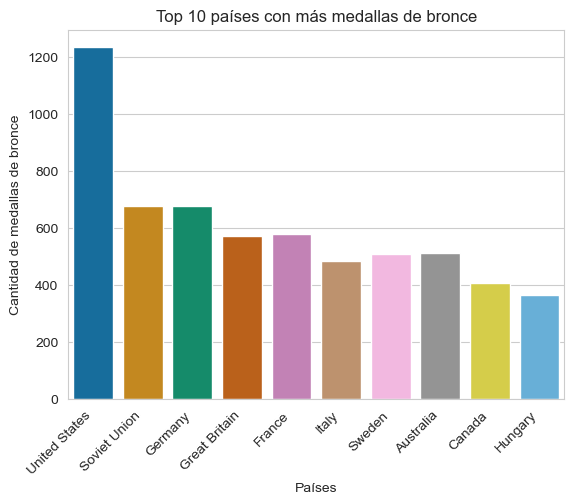

In [17]:
# Graficar las medallas de bronce de los mejores paises
Medallasxpais = data1.groupby('Team')['Medal'].value_counts().unstack().fillna(0)
Medallasxpais['Total'] = Medallasxpais.sum(axis=1)
Medallasxpais = Medallasxpais.sort_values(by='Total', ascending=False)


sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.barplot(data=Medallasxpais.head(10), x=Medallasxpais.head(10).index, y='Bronze')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Países')
plt.ylabel('Cantidad de medallas de bronce')
plt.title('Top 10 países con más medallas de bronce')
plt.show()

In [18]:
## Queda en evidencia la tendencia de los mejores paises en los principales podios. 

In [19]:
# Cuales son los 3 deportes en donde destacan los 3 paises campeones de cada podio?

In [20]:
Deportepais = data1[data1['Team'].isin(['United States', 'Soviet Union', 'Germany'])].groupby(['Team', 'Sport'])['Medal'].value_counts().unstack().fillna(0)
Deportepais['Total'] = Deportepais.sum(axis=1)
Deportepais = Deportepais.sort_values(by='Total', ascending=False)

In [21]:
##Segmentamos por cada potencia deportiva para explorar de forma individual las medallas en sus principales disciplinas

In [22]:
Deportepais_USA = Deportepais.loc["United States"]

In [23]:
Deportepais_USA.head(3)

Medal,Bronze,Gold,Silver,Total
Sport,,,,
Athletics,221.0,537.0,313.0,1071.0
Swimming,171.0,645.0,250.0,1066.0
Basketball,36.0,281.0,24.0,341.0


In [24]:
Deportepais_SU = Deportepais.loc["Soviet Union"]

In [25]:
Deportepais_SU.head(3)

Medal,Bronze,Gold,Silver,Total
Sport,,,,
Gymnastics,48.0,141.0,99.0,288.0
Athletics,89.0,83.0,70.0,242.0
Ice Hockey,17.0,131.0,20.0,168.0


In [26]:
Deportepais_Germany = Deportepais.loc["Germany"]

In [27]:
Deportepais_Germany.head(3)

Medal,Bronze,Gold,Silver,Total
Sport,,,,
Rowing,45.0,95.0,64.0,204.0
Hockey,79.0,65.0,38.0,182.0
Canoeing,31.0,77.0,51.0,159.0


In [28]:
# Es particular que solamente en 'Athletics' las naciones USA/URRS compartan ese deporte, solo 1/9 y 2/3

In [29]:
paises = ['United States', 'Soviet Union', 'Germany']
grupo = data1[data1['Team'].isin(paises)].groupby(['Team', 'Sport'])['Medal'].count()
mejores_deportes = grupo.groupby('Team').nlargest(3).reset_index(level=0, drop=True).reset_index()

In [30]:
mejores_deportes

,Team,Sport,Medal
0,Germany,Rowing,204
1,Germany,Hockey,182
2,Germany,Canoeing,159
3,Soviet Union,Gymnastics,288
4,Soviet Union,Athletics,242
5,Soviet Union,Ice Hockey,168
6,United States,Athletics,1071
7,United States,Swimming,1066
8,United States,Basketball,341


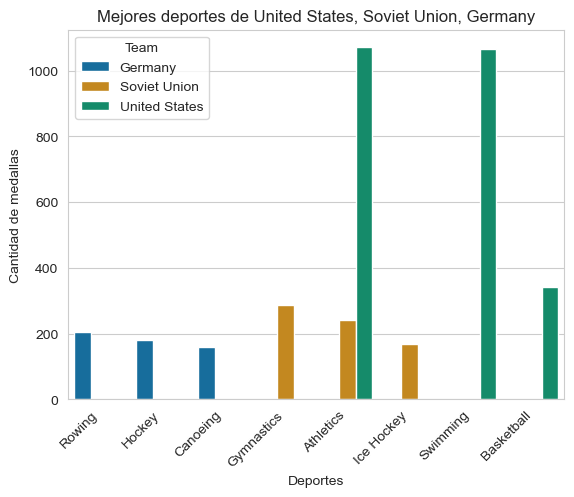

In [49]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
sns.barplot(data=mejores_deportes, x='Sport', y='Medal', hue='Team')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Deportes')
plt.ylabel('Cantidad de medallas')
plt.title('Mejores deportes de ' + ', '.join(paises))
plt.show()

In [125]:
## Cuales fueron los mejores anos victoriosos de Alemania?

In [150]:
# Filtrar el dataset para incluir solo las filas correspondientes a Alemania
germany_data = data1[data1['NOC'] == 'GER']

In [151]:
# Agrupar los datos por año y sumar el número de medallas ganadas en cada año
germany_yearly_totals = germany_data.groupby('Year')['Medal'].count()

In [152]:
# Ordenar los datos de manera descendente por el número de medallas ganadas
germany_yearly_totals_sorted = germany_yearly_totals.sort_values(ascending=False)

In [153]:
# Tomar los primeros cinco años como los mejores años de victorias de medallas de Alemania
best_years = germany_yearly_totals_sorted.head(15)

In [154]:
best_years

Year
1992    236
1936    231
2016    159
2004    149
1964    126
1996    124
2000    118
2008     99
1960     98
2012     94
1928     82
2002     61
1932     57
1956     54
2010     54
Name: Medal, dtype: int64

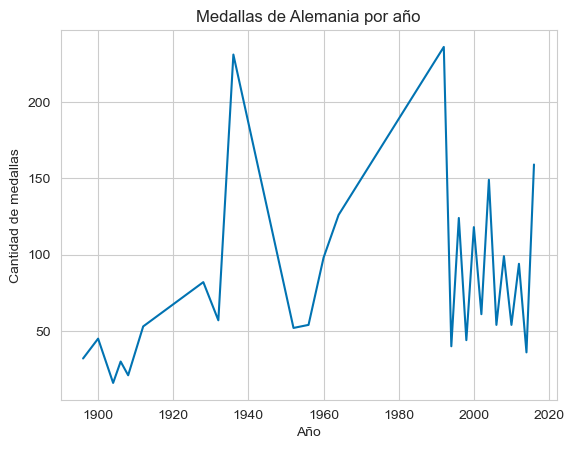

In [70]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Agrupamos los datos por año
germany_yearly_totals_sorted = germany_yearly_totals_sorted.groupby('Year').sum()

# Creamos el gráfico de línea
ax = sns.lineplot(data=germany_yearly_totals_sorted)

# Configuramos los ejes y título
ax.set(xlabel='Año', ylabel='Cantidad de medallas', title='Medallas de Alemania por año')

plt.show()

In [158]:
# Seleccionar los datos de los atletas de cada género
male_data = data1[data1['Sex'] == 'M']
female_data = data1[data1['Sex'] == 'F']

# Agrupar los datos por año y género
male_count = male_data.groupby('Year')['Medal'].count()
female_count = female_data.groupby('Year')['Medal'].count()

# Crear un DataFrame con los datos agrupados
yearly_counts = pd.DataFrame({'Male': male_count, 'Female': female_count})

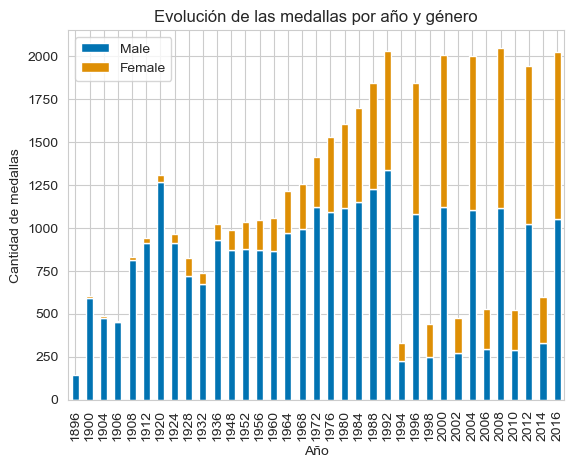

In [159]:
# Graficar los datos
yearly_counts.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de medallas')
plt.title('Evolución de las medallas por año y género')
plt.show()

In [85]:
GermanALL = data1[data1['Team'].isin(['Germany'])].groupby(['Team', 'Year'])['Medal'].value_counts().unstack().fillna(0)


In [86]:
GermanALL

Medal         Bronze  Gold  Silver
Team    Year                      
Germany 1896     2.0  24.0     5.0
        1900     0.0   1.0     1.0
        1904     6.0   4.0     5.0
        1906     6.0  14.0    10.0
        1908     4.0   4.0    11.0
        1912    14.0   6.0    19.0
        1928    41.0  21.0    15.0
        1932    17.0  10.0    26.0
        1936    55.0  93.0    72.0
        1952    25.0   4.0    16.0
        1956    24.0  10.0    20.0
        1960    20.0  38.0    35.0
        1964    53.0  25.0    43.0
        1992    65.0  93.0    66.0
        1994     6.0  14.0    10.0
        1996    45.0  42.0    35.0
        1998     6.0  16.0    12.0
        2000    62.0  31.0    23.0
        2002    10.0  18.0    21.0
        2004    63.0  41.0    43.0
        2006     6.0  15.0    23.0
        2008    41.0  39.0    16.0
        2010    11.0  13.0    18.0
        2012    22.0  43.0    27.0
        2014     7.0  13.0    12.0
        2016    67.0  47.0    43.0

### Acabamos de encontrar que no se estaban registrando los datos entre el periodo de division politica alemana.

In [91]:
#Muestra los nombres de los equipos que han sido registrados como "Alemania" en la columna 'Team'
(data1[data1['Team'].str.contains('Germany')]['Team'].unique())

array(['Germany', 'West Germany', 'East Germany', 'Germany-2',
       'Germany-1', 'East Germany-1', 'Germany-3', 'West Germany-2',
       'West Germany-1', 'East Germany-2', 'Great Britain/Germany',
       'East Germany-3', 'Germany/United States', 'West Germany-3'],
      dtype=object)

In [93]:
#Muestra los códigos de los comités olímpicos nacionales que han sido registrados como "GER" en la columna 'NOC'.
(data1[data1['NOC'].str.contains('GER')]['NOC'].unique())

array(['GER'], dtype=object)

In [119]:
# Crear una copia del DataFrame original
data_alemania = data1.copy()

# Modificar la columna 'Team' para englobar a todas las Alemanias
data_alemania.loc[data_alemania['Team'].str.contains('Germany', case=False), 'Team'] = 'Germany'

# Modificar la columna 'NOC' para que coincida con el nombre de 'Team'
data_alemania.loc[data_alemania['Team'] == 'Germany', 'NOC'] = 'GER'

In [120]:
data_alemania

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [121]:
GermanALL2 = data_alemania[data_alemania['Team'].isin(['Germany'])].groupby(['Team', 'Year'])['Medal'].value_counts().unstack().fillna(0)


In [122]:
GermanALL2

Medal         Bronze   Gold  Silver
Team    Year                       
Germany 1896     2.0   26.0     5.0
        1900     0.0    1.0     1.0
        1904     6.0    4.0     5.0
        1906     6.0   14.0    10.0
        1908     4.0    4.0    11.0
        1912    14.0    6.0    19.0
        1928    46.0   21.0    15.0
        1932    21.0   10.0    26.0
        1936    55.0   95.0    72.0
        1952    25.0    8.0    16.0
        1956    24.0   10.0    20.0
        1960    20.0   38.0    37.0
        1964    53.0   25.0    45.0
        1968    44.0   34.0    41.0
        1972   112.0   83.0    88.0
        1976   111.0  137.0    89.0
        1980    79.0  131.0   101.0
        1984    64.0   46.0    89.0
        1988   104.0  125.0   113.0
        1992    67.0   95.0    74.0
        1994    12.0   18.0    10.0
        1996    47.0   42.0    35.0
        1998    10.0   22.0    12.0
        2000    64.0   31.0    23.0
        2002    12.0   26.0    23.0
        2004    63.0   41.0    45.0
        2006     6.0   23.0    25.0
        2008    41.0   39.0    16.0
        2010    15.0   15.0    24.0
        2012    22.0   45.0    27.0
        2014     9.0   15.0    12.0
        2016    67.0   49.0    43.0

In [143]:
## Podemos observar que en "GermanALL2" tenemos los datos faltantes que notamos en "data_alemania"

In [147]:
# Agrupar los datos por año y sumar el número de medallas ganadas en cada año
germany_yearly_totals2 = data_alemania.groupby('Year')['Medal'].count()

In [148]:
# Ordenar los datos de manera descendente por el número de medallas ganadas
germany_yearly_totals_sorted2 = germany_yearly_totals2.sort_values(ascending=False)

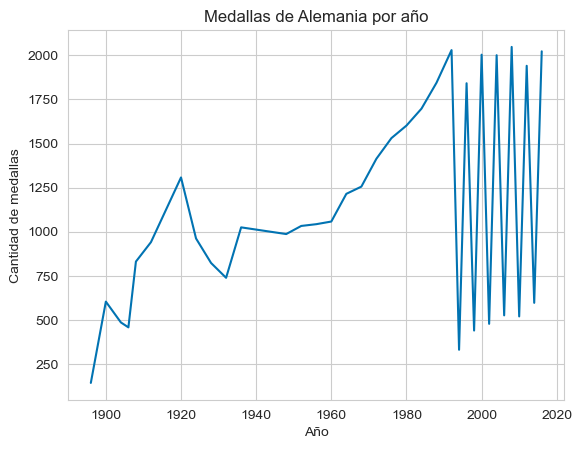

In [149]:
#Graficamos otra vez con los datos historicos modificados: 
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Agrupamos los datos por año
germany_yearly_totals_sorted2 = germany_yearly_totals_sorted2.groupby('Year').sum()

# Creamos el gráfico de línea
ax = sns.lineplot(data=germany_yearly_totals_sorted2)

# Configuramos los ejes y título
ax.set(xlabel='Año', ylabel='Cantidad de medallas', title='Medallas de Alemania por año')

plt.show()

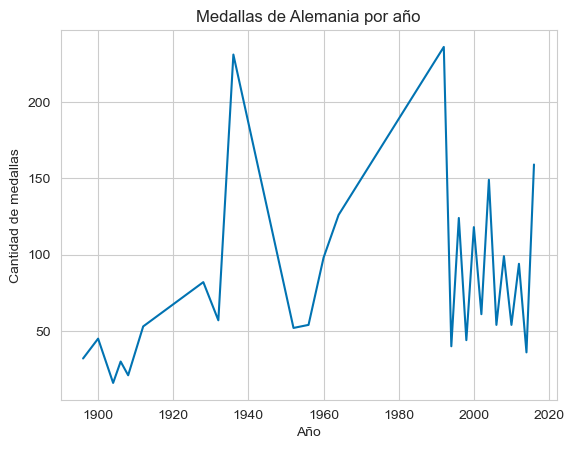

In [155]:
#Anterior grafico:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Agrupamos los datos por año
germany_yearly_totals_sorted = germany_yearly_totals_sorted.groupby('Year').sum()

# Creamos el gráfico de línea
ax = sns.lineplot(data=germany_yearly_totals_sorted)

# Configuramos los ejes y título
ax.set(xlabel='Año', ylabel='Cantidad de medallas', title='Medallas de Alemania por año')

plt.show()

In [161]:
# Seleccionar los datos de los atletas de cada género
male_data = data_alemania[data_alemania['Sex'] == 'M']
female_data = data_alemania[data_alemania['Sex'] == 'F']

# Agrupar los datos por año y género
male_count = male_data.groupby('Year')['Medal'].count()
female_count = female_data.groupby('Year')['Medal'].count()

# Crear un DataFrame con los datos agrupados
yearly_counts2 = pd.DataFrame({'Male': male_count, 'Female': female_count})

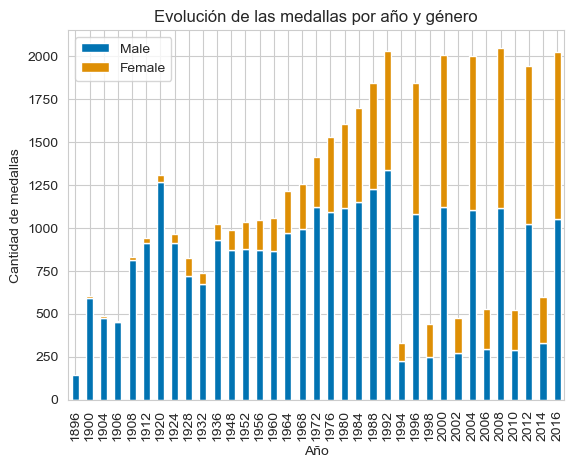

In [162]:
# Graficar los datos Actuales
yearly_counts2.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de medallas')
plt.title('Evolución de las medallas por año y género')
plt.show()

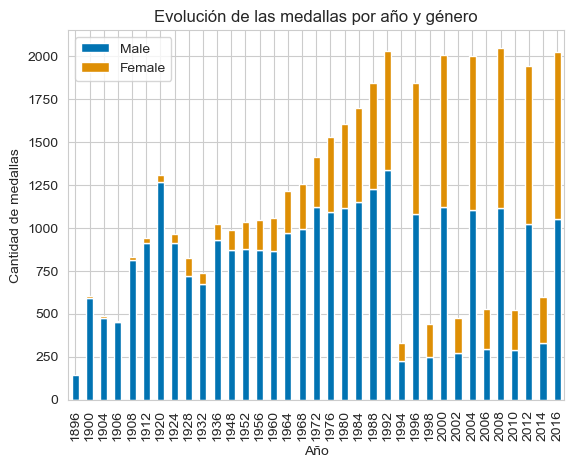

In [164]:
# Graficar los datos Pasados
yearly_counts.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de medallas')
plt.title('Evolución de las medallas por año y género')
plt.show()

## Puntualmente me interesa saber cual fue el top 5 de los mejores paises en Halterofilia.

In [33]:
MPH = data1.loc[data1['Sport'] == 'Weightlifting']

In [34]:
MPH

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
154,59,Ivan Nikolov Abadzhiev,M,24.0,164.0,71.0,Bulgaria,BUL,1956 Summer,1956,Summer,Melbourne,Weightlifting,Weightlifting Men's Lightweight,NaN
155,59,Ivan Nikolov Abadzhiev,M,28.0,164.0,71.0,Bulgaria,BUL,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Middleweight,NaN
156,60,Mikhail Abadzhiev,M,24.0,172.0,75.0,Bulgaria,BUL,1960 Summer,1960,Summer,Roma,Weightlifting,Weightlifting Men's Middleweight,NaN
234,112,Aziz Abbas,M,21.0,169.0,67.0,Iraq,IRQ,1964 Summer,1964,Summer,Tokyo,Weightlifting,Weightlifting Men's Lightweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270780,135419,Zulyn Dalkhjav,M,29.0,157.0,56.0,Mongolia,MGL,1972 Summer,1972,Summer,Munich,Weightlifting,Weightlifting Men's Bantamweight,NaN
270891,135471,Jos Zurera Alberca,M,22.0,162.0,52.0,Spain,ESP,1988 Summer,1988,Summer,Seoul,Weightlifting,Weightlifting Men's Bantamweight,NaN
270892,135471,Jos Zurera Alberca,M,26.0,162.0,52.0,Spain,ESP,1992 Summer,1992,Summer,Barcelona,Weightlifting,Weightlifting Men's Bantamweight,NaN
271004,135516,Krzysztof Maciej Zwarycz,M,21.0,170.0,77.0,Poland,POL,2012 Summer,2012,Summer,London,Weightlifting,Weightlifting Men's Middleweight,NaN


In [35]:
MPH_conteo = data1.groupby('Team')['Medal'].value_counts().unstack().fillna(0)
MPH_conteo['Total'] = Medallasxpais.sum(axis=1)
MPH_m = MPH_conteo.sort_values(by='Total', ascending=False)

In [36]:
MPH_m.head(5)

Medal,Bronze,Gold,Silver,Total
Team,,,,
United States,1233.0,2474.0,1512.0,10438.0
Soviet Union,677.0,1058.0,716.0,4902.0
Germany,678.0,679.0,627.0,3968.0
Great Britain,572.0,519.0,582.0,3346.0
France,577.0,455.0,518.0,3100.0


In [37]:
paises_mph = MPH_m.head(5) 

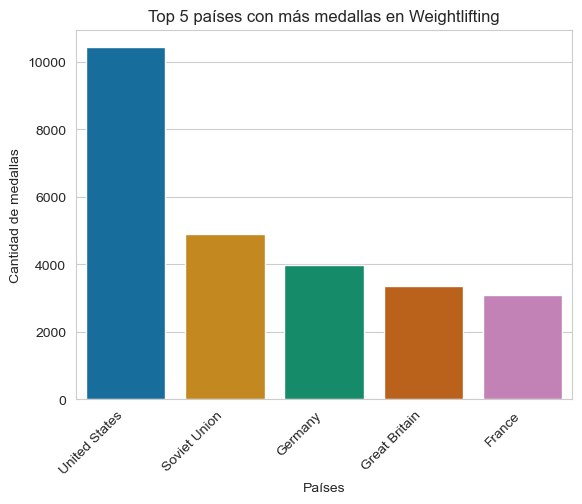

In [38]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
ax = sns.barplot(data=paises_mph, x=paises_mph.index, y='Total')
ax.set(xlabel='Países', ylabel='Cantidad de medallas', title='Top 5 países con más medallas en Weightlifting')
plt.xticks(rotation=45, ha='right')
plt.show()

In [39]:
## Quienes fueron los mejores 5 mejores deportistas en Weightlifting? 

In [40]:
MxAw_conteo = MPH.groupby('Name')['Medal'].value_counts().unstack().fillna(0)
MxAw_conteo['Total'] = MxAw_conteo.sum(axis=1)
MxAw_m = MxAw_conteo.sort_values(by='Total', ascending=False)

In [41]:
MxAw_m.head(15)

Medal,Bronze,Gold,Silver,Total
Name,,,,
"Norbert ""Norb"" Schemansky",2.0,1.0,1.0,4.0
Pyrros Dimas,1.0,3.0,0.0,4.0
Nikolaj Pealov,2.0,1.0,1.0,4.0
Ronny Weller,1.0,1.0,2.0,4.0
Carlo Galimberti,0.0,1.0,2.0,3.0
Halil Mutlu,0.0,3.0,0.0,3.0
"Nicolae ""Nicu"" Vlad",1.0,1.0,1.0,3.0
Imre Fldi,0.0,1.0,2.0,3.0
Arkady Nikitich Vorobyov,1.0,2.0,0.0,3.0


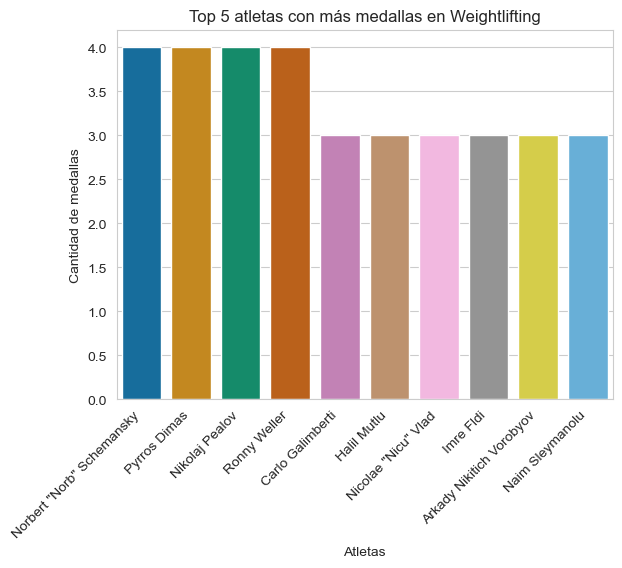

In [42]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")
ax = sns.barplot(data=MxAw_m.head(10), x=MxAw_m.head(10).index, y='Total')
ax.set(xlabel='Atletas', ylabel='Cantidad de medallas', title='Top 5 atletas con más medallas en Weightlifting')
plt.xticks(rotation=45, ha='right')
plt.show()

In [168]:
## Cual es la edad media, minima y maxima  que encontramos en este tipo de atleta de alto rendimiento?

In [171]:
#Edad media de los atletas en los JJOO 
edad_media = data1['Age'].mean()
edad_media

25.556898357297374

In [227]:
#Atletas jovenes de los atletas en los JJOO 
atletas_jovenes = data1.sort_values('Age')
(atletas_jovenes[['Name', 'Age', 'Sex', 'Team', 'Sport']])

,Name,Age,Sex,Team,Sport
142882,Dimitrios Loundras,10.0,M,Ethnikos Gymnastikos Syllogos,Gymnastics
252231,Liana Vicens,11.0,F,Puerto Rico,Swimming
101378,Beatrice Hutiu,11.0,F,Romania,Figure Skating
140650,Liu Luyang,11.0,F,China,Figure Skating
237141,Megan Olwen Devenish Taylor (-Mandeville-Ellis),11.0,F,Great Britain,Figure Skating
...,...,...,...,...,...
270679,Antonio A. Zucchi,NaN,M,Argentina,Hockey
270774,Star Zulu,NaN,M,Zambia,Boxing
270793,Max Zumstein,NaN,M,Switzerland,Hockey
270804,Edmundo Ziga Erraz,NaN,M,Chile,Athletics


In [230]:
atletas_viejos = data1.sort_values('Age', ascending=False)
atletas_viejos_df = atletas_viejos[['Name', 'ID', 'Age', 'Sex', 'Team', 'Sport']]
nombres_unicosv = atletas_viejos_df.drop_duplicates()
nombres_unicosv

,Name,ID,Age,Sex,Team,Sport
257054,John Quincy Adams Ward,128719,97.0,M,United States,Art Competitions
98118,Winslow Homer,49663,96.0,M,United States,Art Competitions
60863,Thomas Cowperthwait Eakins,31173,88.0,M,United States,Art Competitions
9371,George Denholm Armour,5146,84.0,M,Great Britain,Art Competitions
236912,Louis Tauzin,118789,81.0,M,France,Art Competitions
...,...,...,...,...,...,...
270679,Antonio A. Zucchi,135368,NaN,M,Argentina,Hockey
270774,Star Zulu,135416,NaN,M,Zambia,Boxing
270793,Max Zumstein,135426,NaN,M,Switzerland,Hockey
270804,Edmundo Ziga Erraz,135434,NaN,M,Chile,Athletics


In [ ]:
## Quienes fueron los campeones más jovenes dentro de los JJOO?

In [228]:
Cjovenesleyendas = atletas_jovenes.groupby('Name')['Medal'].value_counts().unstack().fillna(0)
Cjovenesleyendas['Total'] = Cjovenesleyendas.sum(axis=1)
Fjovenesleyendas = Cjovenesleyendas.sort_values(by='Total', ascending=False)
Fjovenesleyendas

Medal,Bronze,Gold,Silver,Total
Name,,,,
"Michael Fred Phelps, II",2.0,23.0,3.0,28.0
Larysa Semenivna Latynina (Diriy-),4.0,9.0,5.0,18.0
Nikolay Yefimovich Andrianov,3.0,7.0,5.0,15.0
Borys Anfiyanovych Shakhlin,2.0,7.0,4.0,13.0
Takashi Ono,4.0,5.0,4.0,13.0
...,...,...,...,...
Iain Brambell,1.0,0.0,0.0,1.0
Hyvin Kiyeng Jepkemoi,0.0,0.0,1.0,1.0
Hyleas Christine Fountain,0.0,0.0,1.0,1.0


In [ ]:
## Quienes fueron los mejores y cuantas medallas lograron antes de los 22 anos? 

In [263]:
Cleyendas_medallassub22 = atletas_jovenes[atletas_jovenes['Age'] < 22]
Cleyendas_medallassub22 = Cleyendas_medallassub22.groupby(['Name', 'Age', 'Team', 'Sport'])['Medal'].value_counts().unstack().fillna(0)
Fleyendas_medallassub22 = Cleyendas_medallassub22.select_dtypes(include=np.number)
Fleyendas_medallassub22['Total'] = Cleyendas_medallassub22.sum(axis=1)
Fleyendas_medallassub22A = Fleyendas_medallassub22.sort_values(by='Total', ascending=False)
Fleyendas_medallassub22A.head(15)

,,,Medal,Bronze,Gold,Silver,Total
Name,Age,Team,Sport,,,,
"Michael Fred Phelps, II",19.0,United States,Swimming,2.0,6.0,0.0,8.0
Aleksey Yuryevich Nemov,20.0,Russia,Gymnastics,3.0,2.0,1.0,6.0
"Margit Korondi (Kronstein-, -Plachy, -Szalay)",20.0,Hungary,Gymnastics,4.0,1.0,1.0,6.0
Burton Cecil Downing,19.0,United States,Cycling,1.0,2.0,3.0,6.0
Vitaly Venediktovich Shcherbo,20.0,Unified Team,Gymnastics,0.0,6.0,0.0,6.0
Li Ning,20.0,China,Gymnastics,1.0,3.0,2.0,6.0
Viorica Daniela Siliva (-Harper),16.0,Romania,Gymnastics,1.0,3.0,2.0,6.0
Larysa Semenivna Latynina (Diriy-),21.0,Soviet Union,Gymnastics,1.0,4.0,1.0,6.0
Hryhoriy Anatoliyovych Misiutin,21.0,Unified Team,Gymnastics,0.0,1.0,4.0,5.0


In [ ]:
## Tomemos un recorrido por toda la carrera de 'Michael Fred Phelps'

In [278]:
MFPII = atletas_jovenes[atletas_jovenes['Name'].isin(['Michael Fred Phelps, II'])]
MFPII

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
187887,94406,"Michael Fred Phelps, II",M,15.0,193.0,91.0,United States,USA,2000 Summer,2000,Summer,Sydney,Swimming,Swimming Men's 200 metres Butterfly,NaN
187893,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Individual Medley,Gold
187892,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Butterfly,Gold
187891,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 100 metres Butterfly,Gold
187890,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold
187889,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
187888,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 200 metres Freestyle,Bronze
187894,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 400 metres Individual Medley,Gold
187895,94406,"Michael Fred Phelps, II",M,19.0,193.0,91.0,United States,USA,2004 Summer,2004,Summer,Athina,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold
187896,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,United States,USA,2008 Summer,2008,Summer,Beijing,Swimming,Swimming Men's 200 metres Freestyle,Gold


In [282]:
# Agrupar los datos por año y sumar el número de medallas ganadas en cada año
MFPII_yearly_totals = MFPII.groupby('Year')['Medal'].count()

# Ordenar los datos de manera descendente por el número de medallas ganadas
MFPII_yearly_totals_sorted = MFPII_yearly_totals.sort_values(ascending=False)

MFPII_yearly_totals_sorted

Year
2004    8
2008    8
2012    6
2016    6
2000    0
Name: Medal, dtype: int64

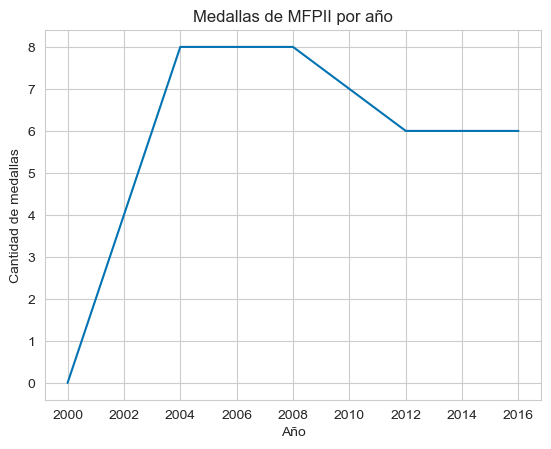

In [280]:
#Graficamos su carrera: 
sns.set_style("whitegrid")
sns.set_palette("colorblind")

# Agrupamos los datos por año
MFPII_yearly_totals_sorted = MFPII_yearly_totals_sorted.groupby('Year').sum()

# Creamos el gráfico de línea
ax = sns.lineplot(data=MFPII_yearly_totals_sorted)

# Configuramos los ejes y título
ax.set(xlabel='Año', ylabel='Cantidad de medallas', title='Medallas de MFPII por año')

plt.show()

In [ ]:
## Quien es el atleta que mas participaciones tuvo en los JJOO? 

In [337]:
# Seleccionar las columnas necesarias y filtrar los atletas que no ganaron medallas
atletas_filt = data1[['Name', 'ID', 'Year', 'Sport', 'Medal']].drop_duplicates()

# Contar el número de participaciones, la primera y última competición de cada atleta
participaciones = atletas_filt.groupby(['Name', 'ID']).agg(
    participaciones=('ID', 'count'),
    primera_competicion=('Year', 'min'),
    ultima_competicion=('Year', 'max'),
    deporte=('Sport', 'first')
).reset_index()

# Renombrar las columnas para que sean más legibles
participaciones = participaciones.rename(columns={'Name': 'Nombre', 'ID': 'ID Atleta'})

# Ordenar los atletas por cantidad de participaciones de forma descendente
participaciones = participaciones.sort_values('participaciones', ascending=False)

participaciones


,Nombre,ID Atleta,participaciones,primera_competicion,ultima_competicion,deporte
116936,Stefania Belmondo,9747,14,1988,2002,Cross Country Skiing
95729,Ole Einar Bjrndalen,11951,14,1994,2014,Biathlon
124070,"Ursula ""Uschi"" Disl",28751,13,1992,2006,Biathlon
2269,Aladr Gerevich (-Gerei),39726,13,1932,1960,Fencing
83725,Mark James Todd,120661,13,1984,2016,Equestrianism
...,...,...,...,...,...,...
68964,Keiji Okuyama,88542,1,1992,1992,Wrestling
22593,Clifford Odame,87975,1,1972,1972,Football
68962,Keiji Kojima,62054,1,1992,1992,Cycling
68961,Keiji Imai,51991,1,1936,1936,Athletics


In [ ]:
## Existen atletas persistenes que participaron aun sin ganar medallas? 

In [338]:
# Seleccionar las columnas necesarias y filtrar los atletas que no ganaron medallas
atletas_filt2 = data1[['Name', 'ID', 'Year', 'Sport',]].drop_duplicates()

# Contar el número de participaciones, la primera y última competición de cada atleta
participaciones2 = atletas_filt2.groupby(['Name', 'ID']).agg(
    participaciones2=('ID', 'count'),
    primera_competicion2=('Year', 'min'),
    ultima_competicion2=('Year', 'max'),
    deporte2=('Sport', 'first')
).reset_index()

# Renombrar las columnas para que sean más legibles
participaciones2 = participaciones2.rename(columns={'Name': 'Nombre', 'ID': 'ID Atleta'})

# Ordenar los atletas por cantidad de participaciones de forma descendente
participaciones2 = participaciones.sort_values('participaciones', ascending=False)

participaciones

,Nombre,ID Atleta,participaciones,primera_competicion,ultima_competicion,deporte
116936,Stefania Belmondo,9747,14,1988,2002,Cross Country Skiing
95729,Ole Einar Bjrndalen,11951,14,1994,2014,Biathlon
124070,"Ursula ""Uschi"" Disl",28751,13,1992,2006,Biathlon
2269,Aladr Gerevich (-Gerei),39726,13,1932,1960,Fencing
83725,Mark James Todd,120661,13,1984,2016,Equestrianism
...,...,...,...,...,...,...
129190,"William ""Bill"" Barry",8179,1,1948,1948,Football
2127,Aki Sudo,116176,1,1998,1998,Ice Hockey
129215,"William ""Bill"" Neale",84968,1,1964,1964,Figure Skating
129216,"William ""Bill"" Neil",85118,1,1960,1960,Football


In [ ]:
## Cuales son los 3 deportes con mas atletas en la historia?

In [364]:
deportexatletac = data1[['Name', 'ID', 'Year', 'Sport']].drop_duplicates()

# Contar el número de atletas únicos por deporte
deportexatleta_ct = deportexatletac.groupby('Sport')['ID'].nunique().reset_index()

# Ordenar los deportes por cantidad de atletas de forma descendente
deportexatleta_ct = deportexatleta_ct.sort_values('ID', ascending=False)

# Tomar los primeros 3 deportes
top3_deportes = deportexatleta_ct.head(6)['Sport'].tolist()

In [365]:
top3_deportes

['Athletics', 'Swimming', 'Rowing', 'Football', 'Cycling', 'Boxing']

In [366]:
deportexatleta_ct.head(6)

,Sport,ID
5,Athletics,22071
54,Swimming,8765
43,Rowing,7687
24,Football,6161
19,Cycling,5819
13,Boxing,5262


In [1]:
# Renombrar las columnas
deportexatleta_ctr = deportexatleta_ct.rename(columns={'Sport': 'Deporte', 'ID': 'Cantidad Atletas'})

NameError: name 'deportexatleta_ct' is not defined

In [ ]:
deportexatleta_ctr